# WeatherPy
----
* Of this randomly selected world cities, temperature is most correlated to the latitudinal locations of cities. The farther away a city is from the Equator, the colder they are and vice versa. 
* The mean temperature of the random sample is 71 degrees (F). 
* Weather variables such as humidity, cloudiness and wind speed have little to no correlation to a city's latitudinal location.
* The hemisphere in which a city is located also has little to no correlation to weather, with the exception of temperature. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "world_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build query URL and request results in Fahrenheit.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"        
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Loop through the list of cities and perform a request for data on each
country = []
temp = []
humidity = []
cloud = []
wind_speed = []
date = []
new_lats = []
new_longs = []
new_cities =[]
counter = 0

print("Beginning data retrieval for each city")
print("--------------------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
   
    try:
        new_lats.append(response['coord']['lat'])
        new_longs.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        new_cities.append(city)
        counter += 1
        print(f"Retrieving results for record {counter} | {city}")
        time.sleep(1)
    except:
        print("City not found...skipping.")
        pass
    
print("--------------------------------------")
print("End of data retrieval")
print("--------------------------------------")

Beginning data retrieval for each city
--------------------------------------
Retrieving results for record 1 | methoni
Retrieving results for record 2 | hermanus
Retrieving results for record 3 | jamestown
Retrieving results for record 4 | upernavik
Retrieving results for record 5 | albany
Retrieving results for record 6 | mataura
Retrieving results for record 7 | khatanga
City not found...skipping.
Retrieving results for record 8 | rikitea
Retrieving results for record 9 | busselton
Retrieving results for record 10 | nikolskoye
Retrieving results for record 11 | careiro da varzea
Retrieving results for record 12 | sakakah
City not found...skipping.
Retrieving results for record 13 | bandar
Retrieving results for record 14 | chuy
Retrieving results for record 15 | senno
Retrieving results for record 16 | mahebourg
Retrieving results for record 17 | zhigansk
Retrieving results for record 18 | bluff
Retrieving results for record 19 | karratha
Retrieving results for record 20 | aklavik
R

Retrieving results for record 176 | salalah
Retrieving results for record 177 | kualakapuas
Retrieving results for record 178 | mundo nuevo
Retrieving results for record 179 | codrington
Retrieving results for record 180 | gorontalo
Retrieving results for record 181 | saint anthony
Retrieving results for record 182 | yar-sale
Retrieving results for record 183 | ust-kuyga
Retrieving results for record 184 | manono
City not found...skipping.
Retrieving results for record 185 | mandalgovi
Retrieving results for record 186 | batagay-alyta
Retrieving results for record 187 | klaeng
Retrieving results for record 188 | akyab
Retrieving results for record 189 | pronsk
Retrieving results for record 190 | bulgan
Retrieving results for record 191 | mnogovershinnyy
Retrieving results for record 192 | longyearbyen
Retrieving results for record 193 | seryshevo
City not found...skipping.
Retrieving results for record 194 | abonnema
City not found...skipping.
Retrieving results for record 195 | kismay

City not found...skipping.
Retrieving results for record 349 | fort nelson
City not found...skipping.
Retrieving results for record 350 | tasiilaq
Retrieving results for record 351 | ulladulla
Retrieving results for record 352 | lowestoft
City not found...skipping.
Retrieving results for record 353 | kattivakkam
City not found...skipping.
Retrieving results for record 354 | mont-dore
Retrieving results for record 355 | tucumcari
Retrieving results for record 356 | luena
Retrieving results for record 357 | sciacca
City not found...skipping.
Retrieving results for record 358 | luderitz
Retrieving results for record 359 | boa vista
Retrieving results for record 360 | bar
Retrieving results for record 361 | half moon bay
Retrieving results for record 362 | berdyaush
Retrieving results for record 363 | tsiroanomandidy
Retrieving results for record 364 | los lunas
Retrieving results for record 365 | opuwo
Retrieving results for record 366 | fukue
City not found...skipping.
Retrieving results

Retrieving results for record 515 | rio claro
City not found...skipping.
Retrieving results for record 516 | portland
Retrieving results for record 517 | fasa
Retrieving results for record 518 | namatanai
Retrieving results for record 519 | qui nhon
Retrieving results for record 520 | sarkikaraagac
City not found...skipping.
Retrieving results for record 521 | taoudenni
Retrieving results for record 522 | nizhniy tsasuchey
Retrieving results for record 523 | sal rei
Retrieving results for record 524 | jiangyou
Retrieving results for record 525 | kodinsk
Retrieving results for record 526 | jibuti
Retrieving results for record 527 | asau
City not found...skipping.
Retrieving results for record 528 | plettenberg bay
Retrieving results for record 529 | terrace bay
Retrieving results for record 530 | muyezerskiy
Retrieving results for record 531 | krasnyy chikoy
Retrieving results for record 532 | guarapari
Retrieving results for record 533 | hami
Retrieving results for record 534 | rome
Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DataFrame and display DataFrame
city_weather_df = pd.DataFrame({
    "City": new_cities,
    "Country": country,
    "Lat": new_lats,
    "Long": new_longs,
    "Temp (F)": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed,
    "Date": date
})
city_weather_df.index.name = "City_ID"
city_weather_df.index +=1
city_weather_df.head()

,City,Country,Lat,Long,Temp (F),Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
1,methoni,GR,36.82,21.70,82.40,51,40,13.87,1593087971
2,hermanus,ZA,-34.42,19.23,70.00,54,39,5.99,1593087972
3,jamestown,US,42.10,-79.24,60.80,77,20,5.82,1593087973
4,upernavik,GL,72.79,-56.15,35.87,91,100,3.18,1593087974
5,albany,US,42.60,-73.97,70.00,50,5,3.60,1593087888


In [6]:
# Exporting city data to csv
city_weather_df.to_csv("world_cities.csv", encoding="utf-8")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df[city_weather_df["Humidity"].gt(100)].index

Int64Index([], dtype='int64', name='City_ID')

In [8]:
#  Double checking to see if there are any rows that have humidity over 100%.
clean_city_df = city_weather_df.loc[city_weather_df["Humidity"] > 100]
len(clean_city_df)

0

In [9]:
# Check for max humidity. 
city_weather_df.describe()

,Lat,Long,Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,20.591451,23.044181,70.815973,66.481229,48.930034,8.149863,1.593088e+09
std,33.052888,88.596764,15.678746,23.215390,38.305032,5.155191,2.035085e+02
min,-54.800000,-175.200000,26.600000,5.000000,0.000000,0.110000,1.593088e+09
25%,-6.615000,-55.852500,60.800000,54.000000,6.000000,3.940000,1.593088e+09
50%,24.200000,27.345000,73.560000,73.000000,43.500000,7.045000,1.593088e+09
75%,48.755000,102.300000,81.337500,83.000000,90.000000,11.180000,1.593088e+09
max,78.220000,178.420000,114.800000,100.000000,100.000000,27.510000,1.593089e+09


#### (No cities with humidity over 100% in this dataframe).

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

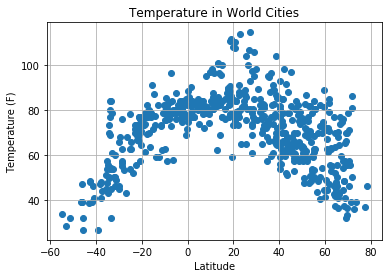

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_weather_df["Lat"], city_weather_df["Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#####  * The code plots the temperatures of 586 randomly selected world cities in relation to their corresponding latitudes. According to the scatter plot, cities closest to the Equator are relatively hotter than cities farther away from the Equator. The farther away the cities are from the Equator, the colder they are.  

## Latitude vs. Humidity Plot

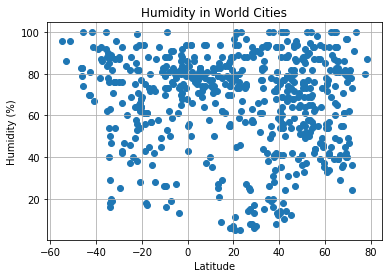

In [13]:
#Latitude vs. Humidity
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

##### * The code plots the percent humidity of the selected world cities in relation to their corresponding latitudes. The scatter plot shows that most of the cities in the sample currently have humidity above 50%, with minimal correlation to their latitudinal location.

## Latitude vs. Cloudiness Plot

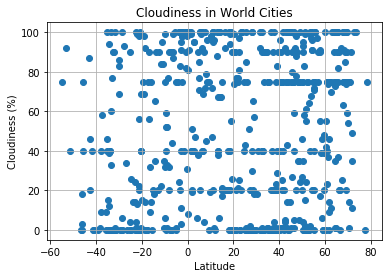

In [14]:
#Latitude vs. Cloudiness
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

 * The code plots the percent cloudiness of the selected world cities in relation to their corresponding latitudes. Thescatter plot shows large clusters of cities either having no to little clouds or 100% (or close to 100%) cloudiness, with minimal correlation to their latitudinal location.  


## Latitude vs. Wind Speed Plot

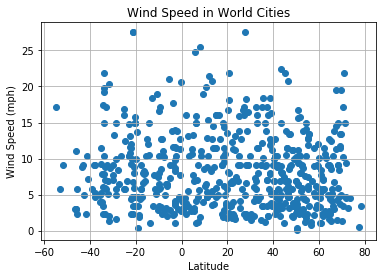

In [15]:
#Latitude vs. Wind Speed
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

##### * The code plots the wind speed (in mph) of the selected world cities in relation to their corresponding latitudes. The scatter plot shows that most of the cities currently have wind speeds below 10 mph, with minimal correlation to their latitudinal location. 

## Linear Regression

In [18]:
# Create Northern Hemisphere dataframe
north_lats = city_weather_df.loc[city_weather_df["Lat"] > 0]
north_lats.head()

,City,Country,Lat,Long,Temp (F),Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
1,methoni,GR,36.82,21.70,82.40,51,40,13.87,1593087971
3,jamestown,US,42.10,-79.24,60.80,77,20,5.82,1593087973
4,upernavik,GL,72.79,-56.15,35.87,91,100,3.18,1593087974
5,albany,US,42.60,-73.97,70.00,50,5,3.60,1593087888
7,khatanga,RU,71.97,102.50,80.78,36,49,9.44,1593087977


In [19]:
# Create Southern Hemisphere dataframe
south_lats = city_weather_df.loc[city_weather_df["Lat"] < 0]
len(south_lats)
south_lats.head()

,City,Country,Lat,Long,Temp (F),Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
2,hermanus,ZA,-34.42,19.23,70.00,54,39,5.99,1593087972
6,mataura,NZ,-46.19,168.86,39.00,83,0,3.00,1593087976
8,rikitea,PF,-23.12,-134.97,71.82,75,24,14.85,1593087978
9,busselton,AU,-33.65,115.33,54.00,88,60,8.86,1593087979
11,careiro da varzea,BR,-3.20,-59.81,84.20,74,20,2.24,1593087981


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

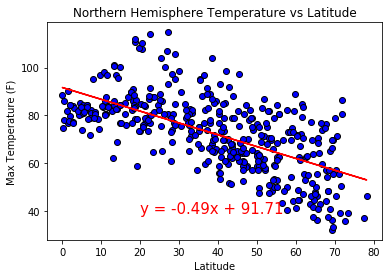

The correlation coefficent (r-squared) is: 0.407001722053526


In [20]:
# Linear regression for Northern Hemisphere temperature vs latitude
x_values = north_lats["Lat"]
y_values = north_lats["Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Linear regression equation string and create plot with labels.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,39),fontsize=15,color="red")
plt.title("Northern Hemisphere Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show();

print(f"The correlation coefficent (r-squared) is: {rvalue**2}")

##### * The code runs a linear regression and plots the max temperatures versus latitude of the selected world cities in the Northern Hemisphere. The regression model shows a negative correlation of medium strength (r-squared value of 0.41) indicating that the further a city is away from the Equator, the colder they are (the lower their temperature). 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

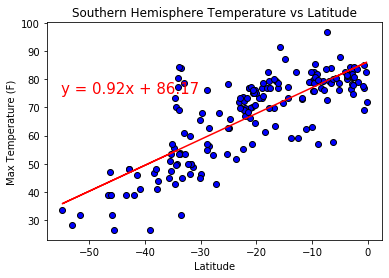

The correlation coefficent (r-squared) is: 0.6372772609040056


In [21]:
# Linear regression for Southern Hemisphere temperature vs latitude
x_values = south_lats["Lat"]
y_values = south_lats["Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Linear regression equation string and create plot with labels.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,75),fontsize=15,color="red")
plt.title("Southern Hemisphere Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show();

print(f"The correlation coefficent (r-squared) is: {rvalue**2}")

##### * The code runs a linear regression and plots the max temperatures versus latitude of the selected world cities in the Southern Hemisphere. The regression model shows a slightly strong positive correlation  (r-squared value of 0.64) indicating that the closer a city is to the Equator, the hotter they are (the higher their temperature). 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

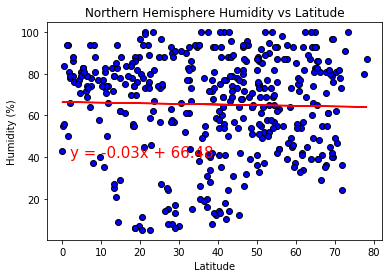

The r-squared is: 0.0006378489933341028


In [22]:
# Linear regression for Northern Hemisphere humidity vs latitude
x_values = north_lats["Lat"]
y_values = north_lats["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Linear regression equation string and create plot with labels.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,40),fontsize=15,color="red")
plt.title("Northern Hemisphere Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show();

print(f"The r-squared is: {rvalue**2}")

##### * The code runs a linear regression and plots the humidity versus latitude of the selected world cities in the Northern Hemisphere. The regression model shows a very weak negative correlation (r-squared value of 0.0006) indicating that there is almost no correlation between a city's latitudinal location and humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

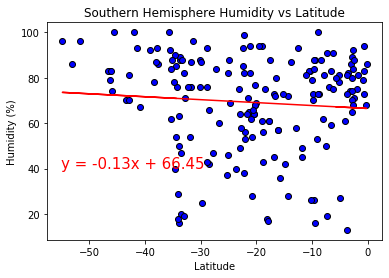

The r-squared is: 0.006614032082154251


In [23]:
# Linear regression for Southern Hemisphere humidity vs latitude
x_values = south_lats["Lat"]
y_values = south_lats["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Linear regression equation string and create plot with labels.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show();

print(f"The r-squared is: {rvalue**2}")

##### * The code runs a linear regression and plots the humidity versus latitude of the selected world cities in the Southern Hemisphere. The regression model shows a very weak negative correlation (r-squared value of 0.006) indicating that there is almost no correlation between a city's latitudinal location and humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

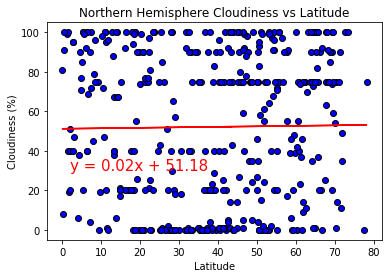

The r-squared is: 0.00016951112935532618


In [24]:
# Linear regression for Northern Hemisphere cloudiness vs latitude
x_values = north_lats["Lat"]
y_values = north_lats["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Linear regression equation string and create plot with labels.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,30),fontsize=15,color="red")
plt.title("Northern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show();

print(f"The r-squared is: {rvalue**2}")

##### * The code runs a linear regression and plots the cloudiness versus latitude of the selected world cities in the Northern Hemisphere. The regression model shows a very weak positive correlation (r-squared value of 0.0002) indicating that there is almost no correlation between a city's latitudinal location and its cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

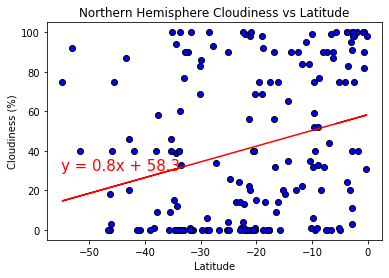

The r-squared is: 0.07518438061942934


In [25]:
# Linear regression for Southern Hemisphere cloudiness vs latitude
x_values = south_lats["Lat"]
y_values = south_lats["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Linear regression equation string and create plot with labels.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.title("Northern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show();

print(f"The r-squared is: {rvalue**2}")

##### * The code runs a linear regression and plots the cloudiness versus latitude of the selected world cities in the Southern Hemisphere. The regression model shows a weak positive correlation (r-squared value of 0.08) indicating that there is almost no correlation between a city's latitudinal location and its cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

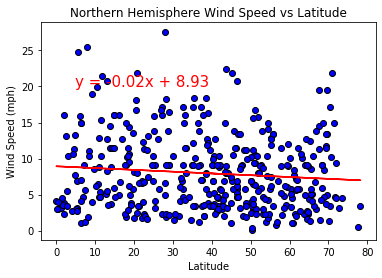

The r-squared is: 0.009529412577974324


In [26]:
# Linear regression for Northern Hemisphere wind speed vs latitude
x_values = north_lats["Lat"]
y_values = north_lats["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Linear regression equation string and create plot with labels.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.title("Northern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show();

print(f"The r-squared is: {rvalue**2}")

##### * The code runs a linear regression and plots the wind speed versus latitude of the selected world cities in the Northern Hemisphere. The regression model shows a very weak negative correlation (r-squared value of 0.01) indicating that there is almost no correlation between a city's latitudinal location and its wind speed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

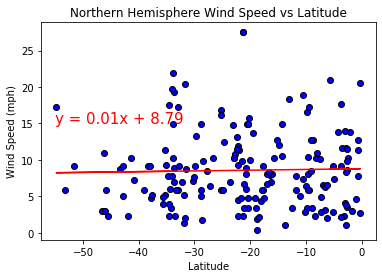

The r-squared is: 0.000655689849912942


In [27]:
# Linear regression for Southern Hemisphere wind speed vs latitude
x_values = south_lats["Lat"]
y_values = south_lats["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Linear regression equation string and create plot with labels.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Northern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show();

print(f"The r-squared is: {rvalue**2}")

##### * The code runs a linear regression and plots the wind speed versus latitude of the selected world cities in the Southern Hemisphere. The regression model shows a very weak positive correlation (r-squared value of 0.0007) indicating that there is almost no correlation between a city's latitudinal location and its wind speed. 